In [38]:
from utils import *
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
db, engine, meta = db_connect()

In [4]:
tables = db_tables(meta)

In [6]:
leg_map = get_leg_map(engine)

In [11]:
switchers = [leg for leg in leg_map.values() if len(leg["switch_congresses"]) == 1]

In [46]:
def plot_switches(switchers, field):
    xs = []
    ys = []
    diffs = []
    for leg in switchers:
        switch_congress = leg["switch_congresses"][0]
        prev_congress = str(int(switch_congress) - 1)
        congress_map = leg["congress_map"]
        ys.append(congress_map[prev_congress][field])
        xs.append(0)
        ys.append(congress_map[switch_congress][field])
        xs.append(1)
        diffs.append(congress_map[switch_congress][field] - congress_map[prev_congress][field])
    plt.scatter(xs, ys)
    plt.title(field)
    plt.show()
    return stats.linregress(xs, ys)

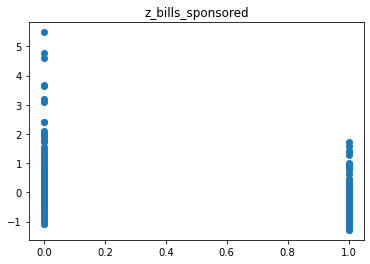

LinregressResult(slope=-0.975960288812865, intercept=0.6560077771693661, rvalue=-0.43385962380369153, pvalue=1.381797794957838e-10, stderr=0.14403422453214)

In [72]:
plot_switches(switchers, 'z_bills_sponsored')

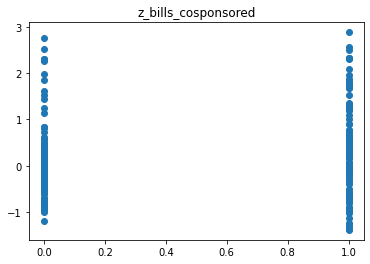

LinregressResult(slope=0.2571961171667291, intercept=0.10322403119408624, rvalue=0.13648264481748787, pvalue=0.05396903914744465, stderr=0.13266957019156256)

In [48]:
plot_switches(switchers, "z_bills_cosponsored")

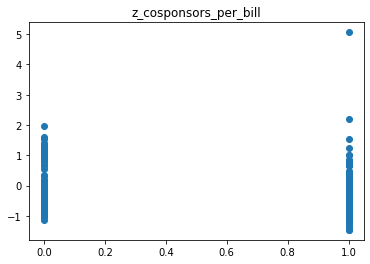

LinregressResult(slope=-0.17810556129956748, intercept=-0.0758073853261265, rvalue=-0.10964062981771702, pvalue=0.12222617069005215, stderr=0.11474854978218788)

In [50]:
plot_switches(switchers, "z_cosponsors_per_bill")

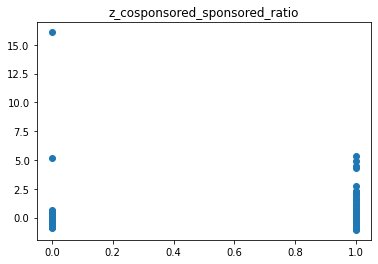

LinregressResult(slope=0.6035132603985366, intercept=-0.17039226448748612, rvalue=0.19889182823610066, pvalue=0.00475190828807478, stderr=0.21133569809990943)

In [51]:
plot_switches(switchers, "z_cosponsored_sponsored_ratio")

In [60]:
def fixed_effects_experience_plot(leg_map, field):
    xs = []
    ys = []
    for leg in leg_map.values():
        congress_map = leg["congress_map"]
        congress_vals = congress_map.values()
        vals = np.array([congress[field] for congress in congress_vals if field in congress], dtype = np.float)
        exprs = [congress["experience"] for congress in congress_vals if field in congress]
        mean_val = np.mean(vals)
        vals -= mean_val
        xs.extend(exprs)
        ys.extend(list(vals))
    plt.scatter(xs, ys)
    plt.title(field)
    plt.show()
    return stats.linregress(xs, ys)

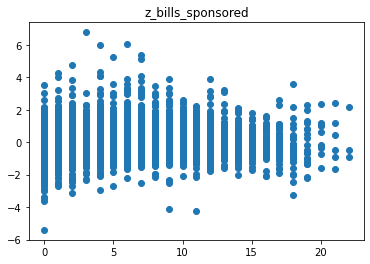

LinregressResult(slope=0.021879667378643587, intercept=-0.08631885599512013, rvalue=0.12762174050442412, pvalue=6.568655907652295e-47, stderr=0.0015148936720244428)

In [68]:
fixed_effects_experience_plot(leg_map, "z_bills_sponsored")

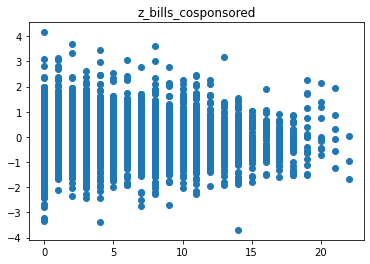

LinregressResult(slope=-0.014999975975623213, intercept=0.05917735145434146, rvalue=-0.10176931306175309, pvalue=2.2808845158543886e-30, stderr=0.0013063061230890601)

In [80]:
fixed_effects_experience_plot(leg_map, "z_bills_cosponsored")

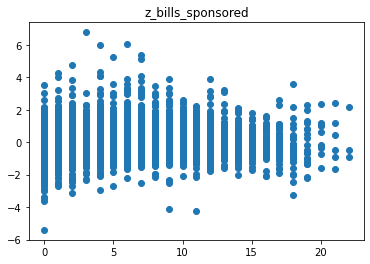

LinregressResult(slope=0.021879667378643587, intercept=-0.08631885599512013, rvalue=0.12762174050442412, pvalue=6.568655907652295e-47, stderr=0.0015148936720244428)

In [77]:
fixed_effects_experience_plot(leg_map, "z_bills_sponsored")

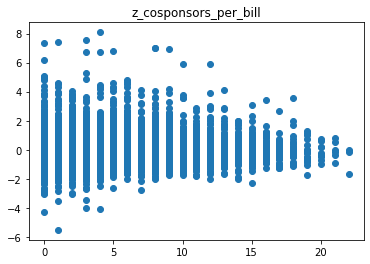

LinregressResult(slope=0.002052607063639529, intercept=-0.008129055339909378, rvalue=0.009898487247038703, pvalue=0.2692146407637158, stderr=0.0018576937551544636)

In [74]:
fixed_effects_experience_plot(leg_map, "z_cosponsors_per_bill")

In [110]:
def simple_experience_plot(leg_map, field, congress = None):
    xs = []
    ys = []
    if congress is not None:
        congress = str(congress)
        for leg in leg_map.values():
            congress_map = leg["congress_map"]
            if congress in congress_map and field in congress_map[congress]:
                xs.append(congress_map[congress]["experience"])
                ys.append(congress_map[congress][field])
    else:
        for leg in leg_map.values():
            congress_map = leg["congress_map"]
            for congress_val in congress_map.values():
                if field in congress_val:
                    xs.append(congress_val["experience"])
                    ys.append(congress_val[field])
    plt.scatter(xs, ys, alpha = 0.2)
    plt.title("{} vs experience: {}".format(field, "all time" if congress is None else congress))
    plt.show()
    return stats.linregress(xs, ys)

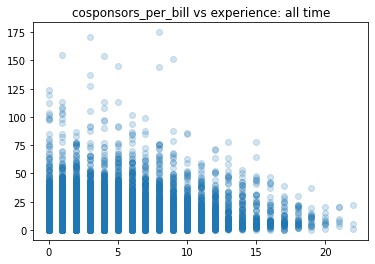

LinregressResult(slope=0.33359836294458495, intercept=11.125924483011781, rvalue=0.09171322784311062, pvalue=1.0844432272101009e-24, stderr=0.03245010602448611)

In [111]:
simple_experience_plot(leg_map, "cosponsors_per_bill")

{'actions': [{'acted_at': '1977-04-25',
   'committee': 'Senate Committee on Finance',
   'references': [],
   'status': 'REFERRED',
   'text': 'Referred to Senate Committee on Finance.',
   'type': 'referral'}],
 'amendments': [],
 'bill_id': 's1379-95',
 'bill_type': 's',
 'committees': [{'activity': ['referral', 'in committee'],
   'committee': 'Senate Finance',
   'committee_id': 'SSFI'}],
 'congress': '95',
 'cosponsors': [{'district': None,
   'name': 'Anderson, Wendell R.',
   'sponsored_at': '1977-01-03',
   'state': 'MN',
   'thomas_id': '01273',
   'title': 'Sen',
   'withdrawn_at': None,
   'bioguide_id': 'A000202'},
  {'district': None,
   'name': 'Durkin, John A.',
   'sponsored_at': '1977-01-03',
   'state': 'NH',
   'thomas_id': '01322',
   'title': 'Sen',
   'withdrawn_at': None,
   'bioguide_id': 'D000574'},
  {'district': None,
   'name': 'Hatfield, Mark O.',
   'sponsored_at': '1977-01-03',
   'state': 'OR',
   'thomas_id': '01352',
   'title': 'Sen',
   'withdrawn_a